In [1]:
import pathlib
from xclim import subset
import xarray
import geopandas as gpd
from shapely.geometry import Point

In [2]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
data = pathlib.Path("/home/mlopez/EXEC/Processed Data Varibales/NorESM1-M_rcp85_tg_mean_annual.nc")
json = pathlib.Path("/home/mlopez/EXEC/Shapefiles/territoire_guide.shp")

In [5]:
shape = gpd.read_file(json)
shape = shape.to_crs({'init': 'epsg:4326'})
shape

,TER_GUIDE,geometry
0,1a,"MULTIPOLYGON (((-72.70926 46.28173, -72.69524 ..."
1,2a,"POLYGON ((-76.08748 46.47438, -76.08807 46.475..."
2,2b,"MULTIPOLYGON (((-70.81729 47.01784, -70.81045 ..."
3,2c,"POLYGON ((-72.38130 45.65191, -72.38112 45.652..."
4,3ab,"POLYGON ((-79.06541 47.29977, -79.06474 47.299..."
5,3c,"POLYGON ((-72.11272 47.05779, -72.11182 47.058..."
6,3d,"POLYGON ((-69.62478 47.06785, -69.62615 47.066..."
7,4a,"POLYGON ((-79.51813 48.09098, -79.50967 48.094..."
8,4bc,"POLYGON ((-76.77250 48.04159, -76.77476 48.035..."
9,4de,"POLYGON ((-72.55568 49.14672, -72.55771 49.141..."


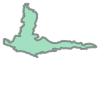

In [6]:
shape.geometry[1]

In [7]:
ds = xarray.open_dataset(data)
ds

<xarray.Dataset>
Dimensions:  (lat: 320, lon: 416, time: 151)
Coordinates:
  * time     (time) object 1950-01-01 00:00:00 ... 2100-01-01 00:00:00
  * lon      (lon) float32 -89.04521 -88.96188 -88.87855 ... -54.54659 -54.46326
  * lat      (lat) float32 66.62331 66.53998 66.45665 ... 40.12437 40.04104
Data variables:
    tg_mean  (time, lat, lon) float32 ...
Attributes:
    Conventions:     CF-1.5
    title:           NorESM1-M model output prepared for CMIP5 historical
    history:         2011-06-01T01:20:15Z CMOR rewrote data to comply with CF...
    institution:     Norwegian Climate Centre
    source:          NorESM1-M 2011  atmosphere: CAM-Oslo (CAM4-Oslo-noresm-v...
    redistribution:  Redistribution prohibited. For internal use only.

In [8]:
nds = ds.indexes['time'].to_datetimeindex()
nds

DatetimeIndex(['1950-01-01', '1951-01-01', '1952-01-01', '1953-01-01',
               '1954-01-01', '1955-01-01', '1956-01-01', '1957-01-01',
               '1958-01-01', '1959-01-01',
               ...
               '2091-01-01', '2092-01-01', '2093-01-01', '2094-01-01',
               '2095-01-01', '2096-01-01', '2097-01-01', '2098-01-01',
               '2099-01-01', '2100-01-01'],
              dtype='datetime64[ns]', length=151, freq=None)

In [9]:
ds['time'] = nds
ds

<xarray.Dataset>
Dimensions:  (lat: 320, lon: 416, time: 151)
Coordinates:
  * time     (time) datetime64[ns] 1950-01-01 1951-01-01 ... 2100-01-01
  * lon      (lon) float32 -89.04521 -88.96188 -88.87855 ... -54.54659 -54.46326
  * lat      (lat) float32 66.62331 66.53998 66.45665 ... 40.12437 40.04104
Data variables:
    tg_mean  (time, lat, lon) float32 ...
Attributes:
    Conventions:     CF-1.5
    title:           NorESM1-M model output prepared for CMIP5 historical
    history:         2011-06-01T01:20:15Z CMOR rewrote data to comply with CF...
    institution:     Norwegian Climate Centre
    source:          NorESM1-M 2011  atmosphere: CAM-Oslo (CAM4-Oslo-noresm-v...
    redistribution:  Redistribution prohibited. For internal use only.

In [13]:
df = ds.to_dataframe().reset_index().dropna()
df 

,lat,lon,time,tg_mean
0,66.623306,-89.045212,1950-01-01,260.487122
1,66.623306,-89.045212,1951-01-01,259.087128
2,66.623306,-89.045212,1952-01-01,258.688416
3,66.623306,-89.045212,1953-01-01,257.983765
4,66.623306,-89.045212,1954-01-01,259.069092
...,...,...,...,...
20065630,40.041039,-74.045807,2096-01-01,289.984100
20065631,40.041039,-74.045807,2097-01-01,290.481293
20065632,40.041039,-74.045807,2098-01-01,290.068420
20065633,40.041039,-74.045807,2099-01-01,290.675110


In [47]:
print(shape.geometry[6])


POLYGON ((-69.62478022038444 47.06785401875684, -69.62614993295057 47.06649765132134, -69.71607347045345 46.97731979802844, -69.79891617479238 46.89481831195423, -69.89481008159609 46.79890407434183, -69.96120478375192 46.73223228501245, -69.99799848410717 46.69519198447608, -70.019487795188 46.59385467235738, -70.02143853932289 46.58463551830007, -70.05436830470131 46.42848784727126, -70.05697322921807 46.41607480489841, -70.06040969776366 46.41315023370436, -70.06946366728 46.41166242077238, -70.07178223906755 46.4112850033362, -70.08152730094989 46.40944341248223, -70.0921458601246 46.40928051188106, -70.09617732721784 46.40752532161614, -70.09774463610597 46.40405198304015, -70.0992244315221 46.40069706340119, -70.10393324846794 46.39496870106915, -70.10991760216569 46.38887810908708, -70.11347148701705 46.38691357923385, -70.11992703661322 46.38455229911736, -70.12219582504343 46.38349912580622, -70.12701449985491 46.38124412313206, -70.12698195408078 46.37946159218527, -70.126848

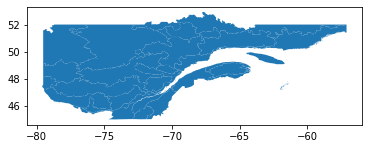

In [49]:
shape.plot()

In [51]:
gdf.sample(40)

,lat,lon,time,tg_mean,geometry
11451118,51.457249,-78.795624,1983-01-01,272.023010,POINT (-78.79562 51.45725)
17537324,43.374241,-82.628799,1983-01-01,280.607147,POINT (-82.62880 43.37424)
10690960,52.457211,-82.295479,1959-01-01,272.145447,POINT (-82.29548 52.45721)
8680196,55.123772,-82.712128,2062-01-01,273.308228,POINT (-82.71213 55.12377)
15267638,46.374119,-87.211952,1978-01-01,278.779846,POINT (-87.21195 46.37412)
7828766,56.290390,-67.212753,1970-01-01,268.954041,POINT (-67.21275 56.29039)
11106914,51.957230,-60.796341,2059-01-01,275.500183,POINT (-60.79634 51.95723)
11033725,52.040562,-66.462784,1954-01-01,270.206970,POINT (-66.46278 52.04056)
8258519,55.707081,-72.712532,1977-01-01,268.448456,POINT (-72.71253 55.70708)
1656269,64.456734,-76.379051,2051-01-01,268.044281,POINT (-76.37905 64.45673)


In [14]:
geom = [Point(x, y) for x, y in zip(df['lon'], df['lat'])]
gdf = gpd.GeoDataFrame(df, geometry=geom)
gdf

,lat,lon,time,tg_mean,geometry
0,66.623306,-89.045212,1950-01-01,260.487122,POINT (-89.04521 66.62331)
1,66.623306,-89.045212,1951-01-01,259.087128,POINT (-89.04521 66.62331)
2,66.623306,-89.045212,1952-01-01,258.688416,POINT (-89.04521 66.62331)
3,66.623306,-89.045212,1953-01-01,257.983765,POINT (-89.04521 66.62331)
4,66.623306,-89.045212,1954-01-01,259.069092,POINT (-89.04521 66.62331)
...,...,...,...,...,...
20065630,40.041039,-74.045807,2096-01-01,289.984100,POINT (-74.04581 40.04104)
20065631,40.041039,-74.045807,2097-01-01,290.481293,POINT (-74.04581 40.04104)
20065632,40.041039,-74.045807,2098-01-01,290.068420,POINT (-74.04581 40.04104)
20065633,40.041039,-74.045807,2099-01-01,290.675110,POINT (-74.04581 40.04104)


In [45]:
gdf.geometry.sample(20)

12853650    POINT (-67.46274 49.62399)
4742224     POINT (-71.96256 60.37356)
15900244    POINT (-84.79538 45.54082)
11897892    POINT (-74.96244 50.87394)
19410323    POINT (-88.96188 40.87434)
11361780    POINT (-58.79642 51.62391)
4484741     POINT (-75.37909 60.70688)
11701712    POINT (-79.21227 51.12393)
1794268     POINT (-69.54599 64.29007)
19937567    POINT (-75.37909 40.20770)
3371041     POINT (-66.04613 62.20682)
15403534    POINT (-81.54551 46.20746)
9782516     POINT (-63.71289 53.70716)
8657303     POINT (-60.62968 55.20710)
13060403    POINT (-57.37981 49.37400)
12470038    POINT (-71.12926 50.12397)
11415487    POINT (-63.79622 51.54058)
1256696     POINT (-88.87855 64.95671)
6054973     POINT (-75.46242 58.62363)
11956814    POINT (-77.04569 50.79061)
Name: geometry, dtype: geometry

In [54]:
pt = Point(-60,51)
row = 11106194

In [63]:
gdf.time.dt.year

0           1950
1           1951
2           1952
3           1953
4           1954
            ... 
20065630    2096
20065631    2097
20065632    2098
20065633    2099
20065634    2100
Name: time, Length: 11507106, dtype: int64

In [64]:
gdf1950 = gdf[gdf.time.dt.year==1950]

In [82]:
regtg = gpd.sjoin(gdf1950, shape, op="within")

In [88]:
gdf.shape

(11507106, 5)

In [95]:
gdf2 = gdf[gdf.time.dt.year<1954]
%time gdf2.sindex

CPU times: user 15.7 s, sys: 35.4 ms, total: 15.7 s
Wall time: 15.7 s


In [96]:
%time gdf.sindex

CPU times: user 10min 47s, sys: 5.35 s, total: 10min 52s
Wall time: 10min 52s


In [98]:
%time res = gpd.sjoin(gdf, shape, op="within")

CPU times: user 4min 41s, sys: 1min, total: 5min 41s
Wall time: 56.8 s


In [124]:
%time mean_by_regions = res.groupby(["TER_GUIDE", "time"]).mean()

CPU times: user 550 ms, sys: 9.96 ms, total: 560 ms
Wall time: 560 ms


In [125]:
mean_by_regions

lat        lon     tg_mean  index_right
TER_GUIDE time                                                     
1a        1950-01-01  45.491516 -73.997895  279.998230            0
          1951-01-01  45.491516 -73.997895  279.172821            0
          1952-01-01  45.491516 -73.997895  278.483673            0
          1953-01-01  45.491516 -73.997895  278.490356            0
          1954-01-01  45.491516 -73.997895  278.652069            0
...                         ...        ...         ...          ...
6opqr     2096-01-01  51.852674 -65.344706  277.827667           24
          2097-01-01  51.852674 -65.344706  278.350983           24
          2098-01-01  51.852674 -65.344706  277.962067           24
          2099-01-01  51.852674 -65.344706  278.889526           24
          2100-01-01  51.852674 -65.344706  279.177673           24

[3775 rows x 4 columns]

In [82]:
regtg = gpd.sjoin(gdf1950, shape, op="within")

In [115]:
import matplotlib.pyplot as plt

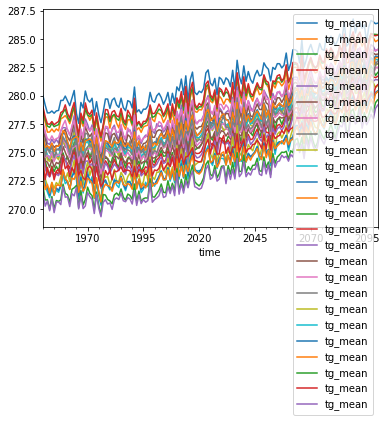

In [116]:
ax = plt.gca()
for (_,rdf) in mean_by_regions.reset_index().groupby("index_right"):
    rdf.plot("time", "tg_mean",ax=ax)

In [83]:
regtg

,lat,lon,time,tg_mean,geometry,index_right,TER_GUIDE
10403296,52.873859,-67.712730,1950-01-01,270.708466,POINT (-67.71273 52.87386),24,6opqr
10403447,52.873859,-67.629402,1950-01-01,270.813965,POINT (-67.62940 52.87386),24,6opqr
10403598,52.873859,-67.546066,1950-01-01,270.861145,POINT (-67.54607 52.87386),24,6opqr
10466112,52.790531,-67.712730,1950-01-01,270.668671,POINT (-67.71273 52.79053),24,6opqr
10466263,52.790531,-67.629402,1950-01-01,270.835114,POINT (-67.62940 52.79053),24,6opqr
...,...,...,...,...,...,...,...
16299695,45.040840,-72.295883,1950-01-01,279.122162,POINT (-72.29588 45.04084),3,2c
16299846,45.040840,-72.212547,1950-01-01,279.456543,POINT (-72.21255 45.04084),3,2c
16299997,45.040840,-72.129219,1950-01-01,279.350128,POINT (-72.12922 45.04084),3,2c
16300148,45.040840,-72.045891,1950-01-01,278.901642,POINT (-72.04589 45.04084),3,2c


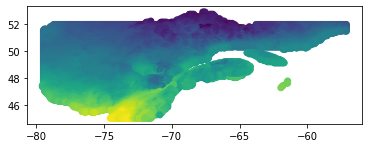

In [86]:
regtg.plot('tg_mean')

In [78]:
gpd.sjoin(shape, gdf1950, op="contains")

,TER_GUIDE,geometry,index_right,lat,lon,time,tg_mean
0,1a,"MULTIPOLYGON (((-72.70926 46.28173, -72.69524 ...",15482030,46.124130,-72.879189,1950-01-01,279.402008
0,1a,"MULTIPOLYGON (((-72.70926 46.28173, -72.69524 ...",15481879,46.124130,-72.962517,1950-01-01,279.415375
0,1a,"MULTIPOLYGON (((-72.70926 46.28173, -72.69524 ...",15481728,46.124130,-73.045853,1950-01-01,279.439514
0,1a,"MULTIPOLYGON (((-72.70926 46.28173, -72.69524 ...",15481577,46.124130,-73.129181,1950-01-01,279.430756
0,1a,"MULTIPOLYGON (((-72.70926 46.28173, -72.69524 ...",15419365,46.207458,-72.795860,1950-01-01,279.224457
...,...,...,...,...,...,...,...
24,6opqr,"POLYGON ((-67.64318 52.92217, -67.63996 52.920...",11407899,51.540581,-67.962723,1950-01-01,270.342590
24,6opqr,"POLYGON ((-67.64318 52.92217, -67.63996 52.920...",11408503,51.540581,-67.629402,1950-01-01,270.570862
24,6opqr,"POLYGON ((-67.64318 52.92217, -67.63996 52.920...",11407597,51.540581,-68.129379,1950-01-01,270.649567
24,6opqr,"POLYGON ((-67.64318 52.92217, -67.63996 52.920...",11408201,51.540581,-67.796059,1950-01-01,270.402069


In [65]:
for i in range(0,100):
    #pt2 = gdf.geometry[row]
    #print(pt2.within(shape.geometry[i]))
    print(gdf1950.geometry.within(shape.geometry[i]).sum())

240
93
278
133
524
292
294
103
879
245
307
181
470
1012
306
251
269
147
1249
2099
846
815
399
743
1217


KeyError: 25

In [20]:
from pyproj import Proj, transform

In [28]:
point.x

-83.12877655029297

In [47]:
?transform

In [46]:
inProj = Proj(init='epsg:4326')
outProj = Proj(init='epsg:32198')
def convert_to_xy(point):
    return Point(transform(inProj,outProj,point.x,point.y))
print(convert_to_xy(gdf.geometry[1]))

TypeError: transform() missing 1 required positional argument: 'y'

CPU times: user 77.2 ms, sys: 4.01 ms, total: 81.2 ms
Wall time: 79.9 ms


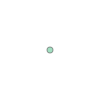

In [45]:
%time convert_to_xy(gdf.geometry[1])

In [40]:
0.067 * gdf.shape[0] / 150

5139.84068

In [69]:
point = -74.04581, 40.04104

In [70]:
print(point)

(-74.04581, 40.04104)


In [63]:
print(shape.geometry[3])

POLYGON ((-72.38129894786316 45.65191194968011, -72.38112435845663 45.65213102564609, -72.38282709654327 45.6529958881551, -72.38380094489582 45.65340034865021, -72.38802759222146 45.65444862741068, -72.38941197297522 45.65451236627622, -72.39209928078905 45.65463940602237, -72.39348315378707 45.65476020049114, -72.39462004542843 45.65516534452247, -72.39551513954083 45.65528379732547, -72.39608333793244 45.65551491328027, -72.39697844118403 45.65563335478933, -72.39860572513645 45.65586945063178, -72.40047332921664 45.65656350925072, -72.40314905143902 45.65800370676122, -72.405011199371 45.65932584921671, -72.40582034926415 45.65995778986675, -72.40752118970917 45.66110782181421, -72.40930307343294 45.66231531069232, -72.41051920279773 45.66300620327295, -72.4123851943331 45.66392849534122, -72.41603886248602 45.66542998871177, -72.41831739050272 45.66578298865456, -72.41994211228086 45.666361420489, -72.42140586570167 45.66671067367626, -72.42327608166559 45.66717595001815, -72.4272

In [67]:
gdf

,lat,lon,time,tg_mean,geometry
0,66.623306,-89.045212,1950-01-01 00:00:00,260.487122,POINT (-89.04521 66.62331)
1,66.623306,-89.045212,1951-01-01 00:00:00,259.087128,POINT (-89.04521 66.62331)
2,66.623306,-89.045212,1952-01-01 00:00:00,258.688416,POINT (-89.04521 66.62331)
3,66.623306,-89.045212,1953-01-01 00:00:00,257.983765,POINT (-89.04521 66.62331)
4,66.623306,-89.045212,1954-01-01 00:00:00,259.069092,POINT (-89.04521 66.62331)
...,...,...,...,...,...
20065630,40.041039,-74.045807,2096-01-01 00:00:00,289.984100,POINT (-74.04581 40.04104)
20065631,40.041039,-74.045807,2097-01-01 00:00:00,290.481293,POINT (-74.04581 40.04104)
20065632,40.041039,-74.045807,2098-01-01 00:00:00,290.068420,POINT (-74.04581 40.04104)
20065633,40.041039,-74.045807,2099-01-01 00:00:00,290.675110,POINT (-74.04581 40.04104)


In [ ]:
poly = shape.geometry[20065633]
for point in gdf.geometry[1:gdf.shape[0] // 15]:
    if point.within(poly):
        print(point)


In [ ]:
shape

In [ ]:
def convert_to_xy
    for 

In [37]:
gdf.to_file("tgmenaannuel.shp", driver='ESRI Shapefile')

ValueError: Invalid field type <class 'cftime._cftime.DatetimeNoLeap'>

In [33]:
data2 = pathlib.Path("tgmenaannuel.shp")

In [36]:
ds2 = gpd.read_file(data2)
ds2

IndexError: too many indices for array

Empty GeoDataFrame
Columns: [lat, lon, time, tg_mean, geometry]
Index: []

In [42]:
ss = subset.subset_shape(json, gdf, start_date='1950-01-01', end_date='1952-01-01')
ss

AttributeError: 'GeoDataFrame' object has no attribute 'startswith'

In [45]:
join = gpd.sjoin(shape, gdf)

In [46]:
join

IndexError: too many indices for array

Empty GeoDataFrame
Columns: [TER_GUIDE, geometry, index_right, lat, lon, time, tg_mean]
Index: []

In [ ]:

for i in ss:
    ds = xarray.open_dataset(i)
    df = ds.to_dataframe().reset_index()
    geom = [Point(x, y) for x, y in zip(df['lon'], df['lat'])]
    gdf = gpd.GeoDataFrame(df, geometry=geom)
    gdf.to_json(f"{i}.json")